In [1]:
import numpy as np
from equadratures import *

def blackbox(x):
    mu = (x[0] + 1.0) * 0.5 * 0.001 + 0.40
    velocity = (x[1] + 1.0) * 0.5 + 49
    D = 1.0
    L = 1000.0
    density = 870.0
    Q = np.pi * D**2 * velocity * 1.0/4.0
    Reynolds_number = D * velocity * density * 1.0/mu
    f = 16.0 / Reynolds_number
    delta_pressure = 2.0 * f * (L/D) * density * velocity**2
    return delta_pressure * Q

viscosity = Parameter(distribution='Beta', lower=-3., upper=1., order=2, shape_parameter_A = 3.2, shape_parameter_B=1.6)
velocity = Parameter(distribution='Beta', lower=-2., upper=1., order=2, shape_parameter_A = 1.2, shape_parameter_B=1.6)
#viscosity = Parameter(distribution='Gaussian', shape_parameter_A = 3.2, shape_parameter_B=1.6, order = 2)
#velocity = Parameter(distribution='Gaussian', shape_parameter_A = 1.3, shape_parameter_B=0.2, order = 2)
# Poly 1
poly = Polyint([viscosity, velocity], Basis('Tensor grid'))
poly.computeCoefficients(blackbox)

# Poly 2
poly2 = Polylsq([viscosity, velocity], Basis('Tensor grid'), mesh='tensor', optimization='greedy-qr', oversampling=1.0)
poly2.computeCoefficients(blackbox)


fun = poly.getPolyFitFunction()
x, fx = poly.getFunctionSamples(150)
x2, fx2 = poly2.getFunctionSamples(150)

y = utils.evalfunction(function=blackbox, points=x)
y2 = utils.evalfunction(function=blackbox, points=poly.quadraturePoints)

[[-2.36747437 -1.3677309 ]
 [-2.36747437 -0.41844643]
 [-2.36747437  0.49072279]
 [-1.34126561 -1.3677309 ]
 [-1.34126561 -0.41844643]
 [-1.34126561  0.49072279]
 [-0.18014891 -1.3677309 ]
 [-0.18014891 -0.41844643]
 [-0.18014891  0.49072279]]
*******


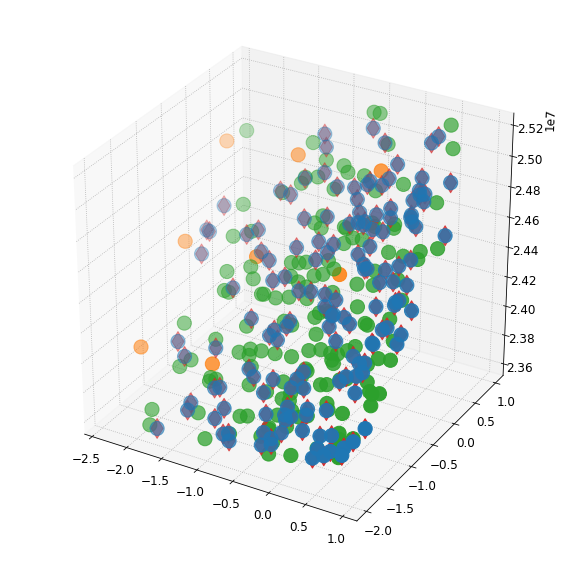

In [2]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.grid(True)
ax.scatter(x[:,0], x[:,1],y, s=200)
ax.scatter(poly.quadraturePoints[:,0], poly.quadraturePoints[:,1], y2, s=200)
ax.scatter(x2[:,0], x2[:,1], fx2, s=200)
ax.scatter(x[:,0], x[:,1], fx, s=200, marker='d')
#ax.view_init(45 , 30)
plt.show()

In [3]:
print poly.coefficients, poly.basis.elements

[[ 2.44329299e+07]
 [ 3.07399701e+05]
 [ 1.07537826e+03]
 [ 2.12694472e+04]
 [ 2.67598758e+02]
 [ 9.36142375e-01]
 [-1.62612689e-08]
 [-2.21998164e-10]
 [ 1.28513374e-09]] [[0. 0.]
 [0. 1.]
 [0. 2.]
 [1. 0.]
 [1. 1.]
 [1. 2.]
 [2. 0.]
 [2. 1.]
 [2. 2.]]


In [4]:
print poly2.coefficients, poly2.basis.elements

[[ 2.44329299e+07]
 [ 3.07399701e+05]
 [ 1.07537826e+03]
 [ 2.12694472e+04]
 [ 2.67598758e+02]
 [ 9.36142374e-01]
 [-4.84309111e-09]
 [-3.41934389e-10]
 [ 9.16485706e-10]] [[0. 0.]
 [0. 1.]
 [0. 2.]
 [1. 0.]
 [1. 1.]
 [1. 2.]
 [2. 0.]
 [2. 1.]
 [2. 2.]]
